# Banknote Dataset

The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. 

There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

Variance of Wavelet Transformed image (continuous).

Skewness of Wavelet Transformed image (continuous).

Kurtosis of Wavelet Transformed image (continuous).

Entropy of image (continuous).

Class (0 for authentic, 1 for inauthentic).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 50%.

# Data Loading and Preprocessing:

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# Define the column names
column_names = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

# Read the text file directly into a DataFrame using pandas
df = pd.read_csv('/Users/elahehbeheshti/Desktop/Fall2024/Machine Learning/Algorithm/Perceptron-Adeline/data_banknote_authentication.txt', delimiter=",", names=column_names)  # Modify delimiter as per the file structure
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows


First few rows of the dataset:
   Variance  Skewness  Kurtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


2. Data Preprocessing:

In [51]:
# Extract the target variable
y = df['Class'].values  # Target variable (0 for authentic, 1 for inauthentic)

# Convert class labels to -1 and 1 for compatibility with Perceptron
y = np.where(y == 0, -1, 1)

# Extract all four features for training
X = df[['Variance', 'Skewness', 'Kurtosis', 'Entropy']].values


3. Perceptron Class Definition

# Training the Perceptron:

In [52]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [53]:
df.tail()

,Variance,Skewness,Kurtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


the columns are:

Variance

Skewness

Kurtosis

Entropy

Class (0 for authentic, 1 for inauthentic)

We will:

Select samples from the two classes (0 and 1).

Use two of the four features (e.g., Variance and Skewness) to create a scatter plot.

Plot the points with different colors and markers to distinguish between authentic and inauthentic banknotes.

Adjust the labels and axis names to reflect the new variables.

4. Experiment with Different Learning Rates:


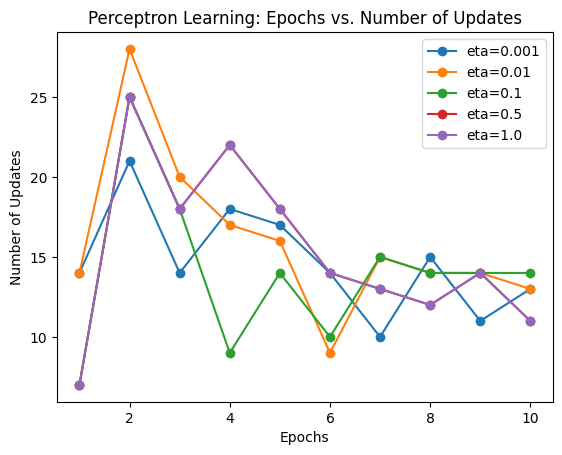

In [54]:
# Define different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Train the Perceptron model using each learning rate and plot the errors over epochs
for eta in learning_rates:
    # Initialize and train the Perceptron
    ppn = Perceptron(eta=eta, n_iter=10)
    ppn.fit(X, y)

    # Plotting the number of updates vs. epochs to show the learning progress
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', label=f'eta={eta}')
    plt.xlabel('Epochs')
    plt.ylabel('Number of Updates')
    plt.title('Perceptron Learning: Epochs vs. Number of Updates')
    plt.legend(loc='upper right')

# Display the plot for all learning rates
plt.show()


5. Split Data for Model Evaluation:


In [55]:
# Split the data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


6. Train Perceptron Model and Evaluate on Test Set:


In [56]:
# Train the Perceptron with a selected learning rate (e.g., 0.01)
ppn_final = Perceptron(eta=0.01, n_iter=10)
ppn_final.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ppn_final.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Test Set Accuracy: {accuracy:.4f}')


Perceptron Test Set Accuracy: 0.9757


7. Decision Boundary Visualization:

In [58]:
#select Variance (index 0) and Skewness (index 1).
yp = df.iloc[150, 4] # Target label for 150th sample
yp = np.where(yp == 0, -1, 1)

# Select all four features for the 150th sample
XP = df.iloc[150, [0, 1, 2, 3]].values.reshape(1, -1)  # Use all features

print(yp)
ppn.predict(XP)

-1


array([-1])

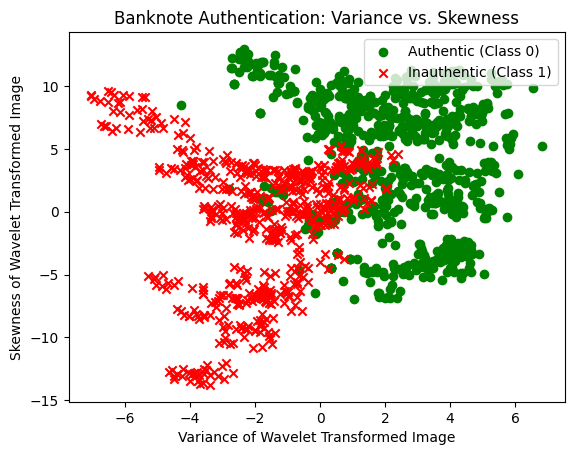

In [59]:
import matplotlib.pyplot as plt
# Select target lables (the authentic (0) and inauthentic (1) classes)
y = df['Class'].values  # Target variable (Class column)

# Select two features for visualization
# Extract Variance and Skewness for visualization
X = df[['Variance', 'Skewness']].values  # Features: Variance and Skewness

# Scatter plot of the two classes based on the selected features
# Plot authentic banknotes (class 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green', marker='o', label='Authentic (Class 0)')

# Plot inauthentic banknotes (class 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Inauthentic (Class 1)')

# Add axis labels and title
plt.xlabel('Variance of Wavelet Transformed Image')
plt.ylabel('Skewness of Wavelet Transformed Image')
plt.title('Banknote Authentication: Variance vs. Skewness')
plt.legend(loc='upper right')

# Display the plot
plt.show()


plot other features (e.g., Kurtosis vs. Entropy)

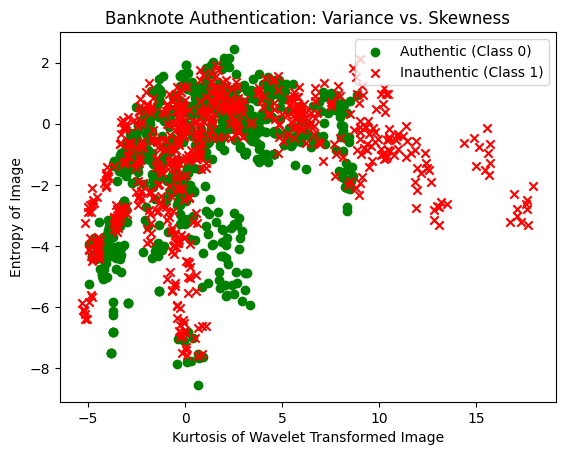

In [60]:
# Select the authentic (0) and inauthentic (1) classes
y = df['Class'].values  # Target variable (Class column)

# Extract Kurtosis and Entropy for visualization
X = df[['Kurtosis', 'Entropy']].values


# Plot the data points for both classes
# Plot authentic banknotes (class 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green', marker='o', label='Authentic (Class 0)')

# Plot inauthentic banknotes (class 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Inauthentic (Class 1)')

# Add axis labels and title
plt.xlabel('Kurtosis of Wavelet Transformed Image')
plt.ylabel('Entropy of Image')
plt.title('Banknote Authentication: Variance vs. Skewness')
plt.legend(loc='upper right')

# Display the plot
plt.show()

Accuracy for Variance vs. Skewness: 0.8859


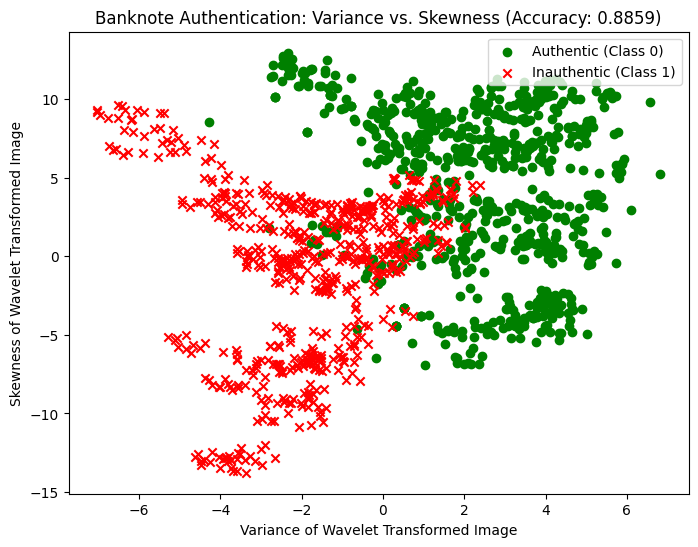

Accuracy for Variance vs. Kurtosis: 0.8495


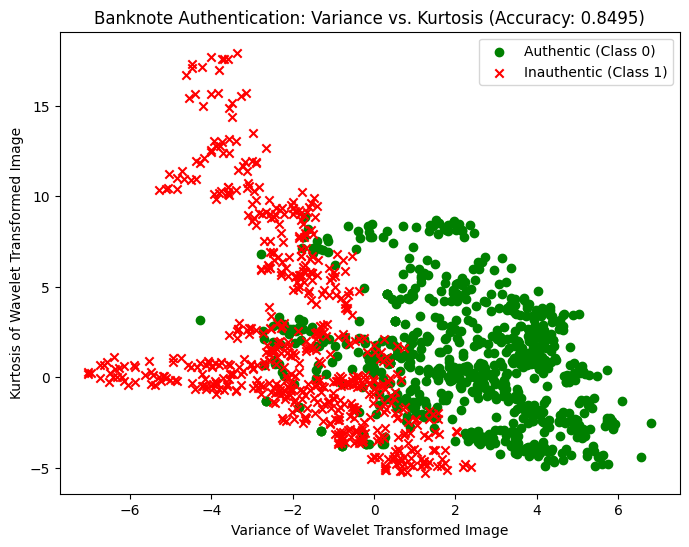

Accuracy for Variance vs. Entropy: 0.8689


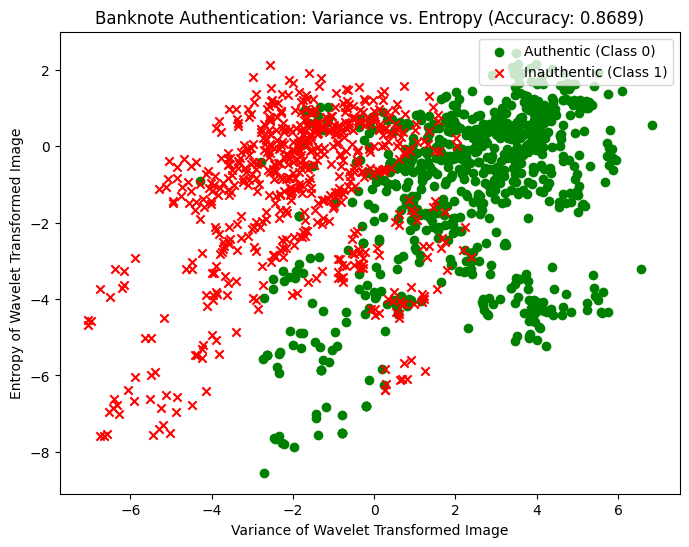

Accuracy for Skewness vs. Kurtosis: 0.7670


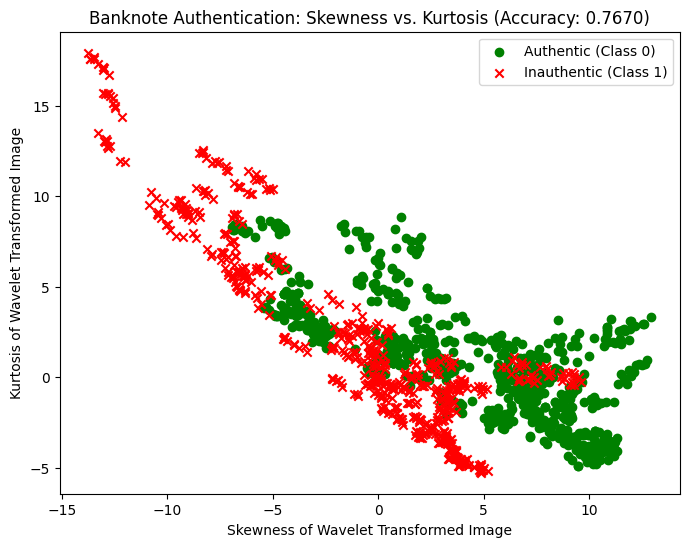

Accuracy for Skewness vs. Entropy: 0.6869


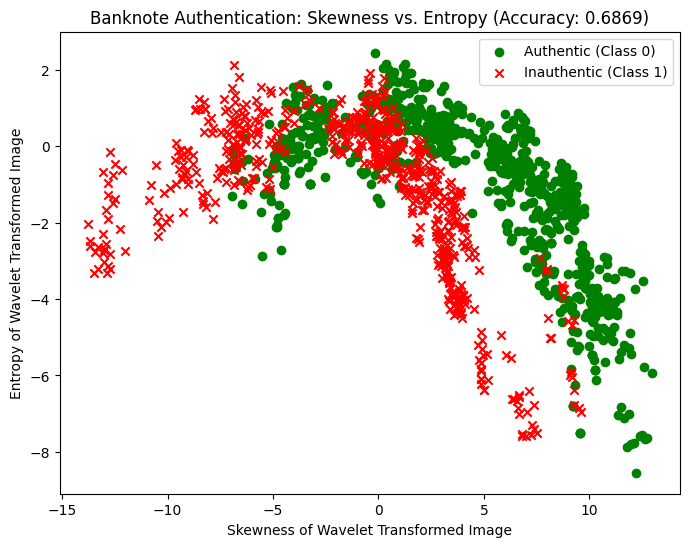

Accuracy for Kurtosis vs. Entropy: 0.5680


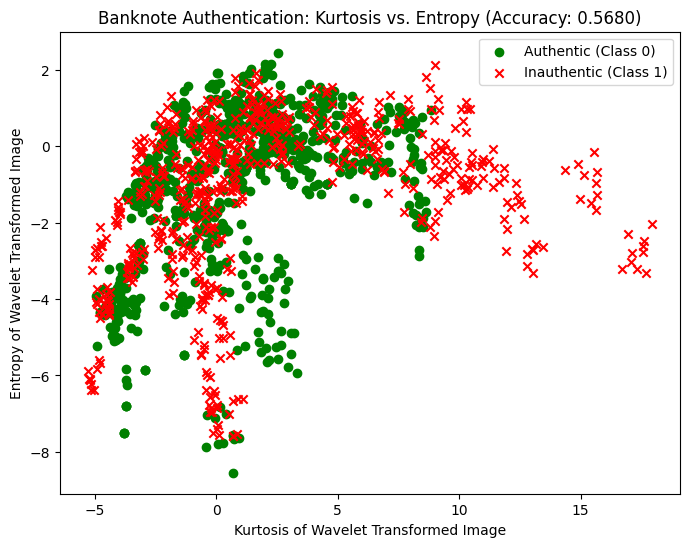


Best feature pair: ('Variance', 'Skewness') with accuracy = 0.8859


In [61]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score           # Import accuracy_score
# Select target labels
y = df['Class'].values  # Target variable (Class column)

# Define feature pairs to plot, including Variance vs. Skewness
feature_pairs = [
    ('Variance', 'Skewness'),
    ('Variance', 'Kurtosis'),
    ('Variance', 'Entropy'),
    ('Skewness', 'Kurtosis'),
    ('Skewness', 'Entropy'),
    ('Kurtosis', 'Entropy')
]

# Create scatter plots and evaluate each feature pair
best_pair = None
best_accuracy = 0.0

for feature_x, feature_y in feature_pairs:
    # Select the features for the x and y axes
    X = df[[feature_x, feature_y]].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a simple Logistic Regression classifier
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {feature_x} vs. {feature_y}: {accuracy:.4f}')
    
    # Track the best feature pair based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pair = (feature_x, feature_y)

    # Plotting each feature pair for visual inspection
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green', marker='o', label='Authentic (Class 0)')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Inauthentic (Class 1)')
    plt.xlabel(f'{feature_x} of Wavelet Transformed Image')
    plt.ylabel(f'{feature_y} of Wavelet Transformed Image')
    plt.title(f'Banknote Authentication: {feature_x} vs. {feature_y} (Accuracy: {accuracy:.4f})')
    plt.legend(loc='upper right')
    plt.show()

# Display the best feature pair based on Logistic Regression accuracy
print(f'\nBest feature pair: {best_pair} with accuracy = {best_accuracy:.4f}')


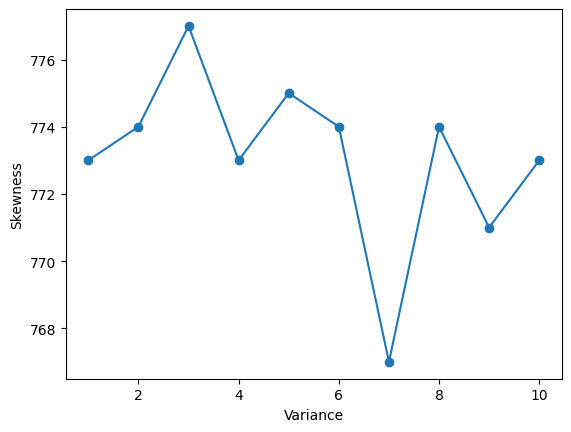

In [62]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.show()

In [63]:
##The class labels are 0 for authentic and 1 for inauthentic.
##I convert the class labels to -1 and 1 for compatibility with the Perceptron model.


# Select the target label for the 101st row in the dataset
yp = df.iloc[101, 4]  # This will be either 0 or 1
# Convert class label to -1 (for 0) and 1 (for 1)
yp = np.where(yp == 0, -1, 1)
print(f"True class label of the 101st sample: {yp}")

# Select the features (Variance and Skewness) for the 101st sample for prediction
XP = df.iloc[101, [0, 1]].values.reshape(1, -1)  # Use .reshape(1, -1) to make it 2D array
print(f"Features of the 101st sample (Variance, Skewness): {XP}")

# Assuming the Perceptron (ppn) has been trained already, use it to predict this sample
predicted_label = ppn.predict(XP)
print(f"Predicted class label by Perceptron: {predicted_label}")


# extract sepal length and petal length
XP = df.iloc[101, [0, 2]].values
print(yp)
ppn.predict(XP)

True class label of the 101st sample: -1
Features of the 101st sample (Variance, Skewness): [[ 4.5597 -2.4211]]
Predicted class label by Perceptron: [1]
-1


array(-1)

In [64]:
#select Variance (index 0) and Skewness (index 1).
yp = df.iloc[150, 4]
yp = np.where(yp == 0, -1, 1)

XP = df.iloc[150, [0, 1]].values.reshape(1, -1)

print(yp)
ppn.predict(XP)

-1


array([-1])

plot_decision_regions(), that visualizes the decision boundaries of a classifier for a 2D dataset.

This is useful when you want to see how a trained model (e.g., Perceptron, Logistic Regression, SVM, etc.) separates different classes 
visually.

y's unique value:  [0 1]
Z's top five:  [1 1 1 1 1]
Z's shape before reshape:  (819650,)
Z's shape:  (650, 1261)


/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_82279/2190871983.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


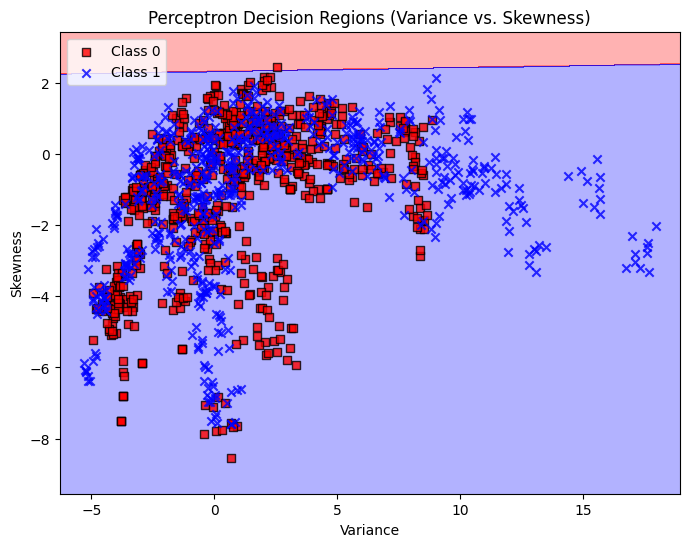

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Define the function to plot decision regions (from your code)
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    print("y's unique value: ", np.unique(y))
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("Z's top five: ", Z[:5])
    print("Z's shape before reshape: ", Z.shape)
    Z = Z.reshape(xx1.shape)
    print("Z's shape: ", Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Plot decision regions for Variance and Skewness
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Perceptron Decision Regions (Variance vs. Skewness)')
plt.legend(loc='upper left')
plt.show()



y's unique value:  [0 1]
Z's top five:  [1 1 1 1 1]
Z's shape before reshape:  (819650,)
Z's shape:  (650, 1261)


/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_82279/2190871983.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


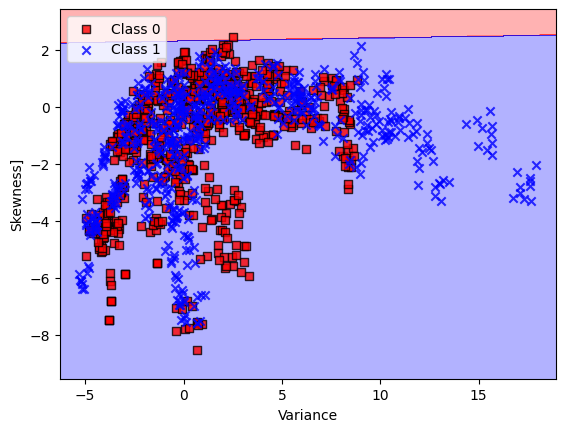

In [66]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Variance')
plt.ylabel('Skewness]')
plt.legend(loc='upper left')
#plt.colorbar();


# plt.savefig('images/02_08.png', dpi=300)
plt.show()